In [1]:
import os

while '.gitignore' not in os.listdir():
    os.chdir('..')
# print(os.listdir())


from jax import numpy as jnp
from jax.image import resize
from src import img_utils, img_plot_utils
import matplotlib.pyplot as plt
import cv2

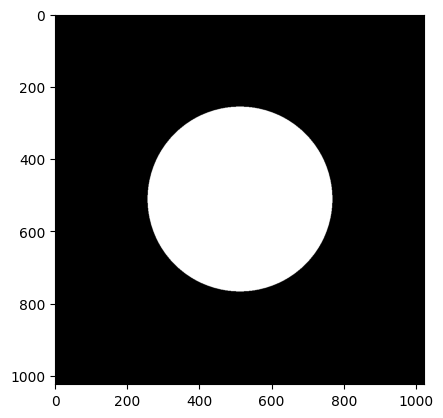

In [2]:
x, y = jnp.meshgrid(
    jnp.linspace(-2, 2, 1024),
    jnp.linspace(-2, 2, 1024),
)
r = jnp.sqrt( x**2 + y**2 )
image = jnp.where(r<1, 1, 0)
plt.imshow(image, cmap='gray')


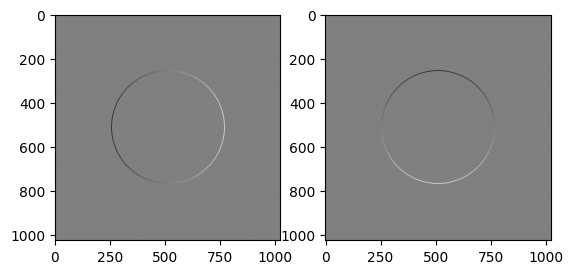

In [4]:
img_x, img_y = img_utils.line_detection(image)

_, (ax1, ax2) = plt.subplots( 1, 2 )
ax1.imshow( img_x, cmap='gray' )
ax2.imshow( img_y, cmap='gray' )
plt.show()

# This is how things are actually implemented

In [5]:
p = jnp.array([ 0.030320,  0.249724, 0.439911, 0.249724, 0.030320])
d = jnp.array([-0.104550, -0.292315, 0,        0.292315, 0.104550])

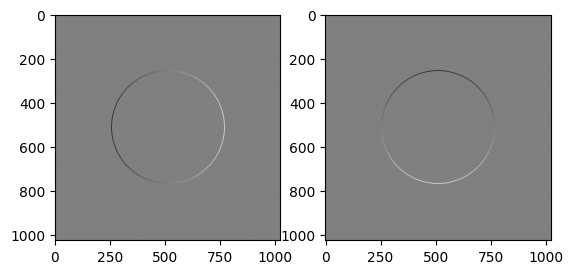

In [6]:
img_x = img_utils.sepfir2( image, d, p )
img_y = img_utils.sepfir2( image, p, d )

_, (ax1, ax2) = plt.subplots( 1, 2 )
ax1.imshow( img_x, cmap='gray' )
ax2.imshow( img_y, cmap='gray' )
plt.show()

# Combining the x and y components

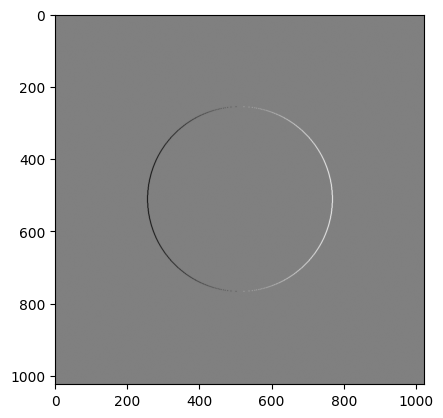

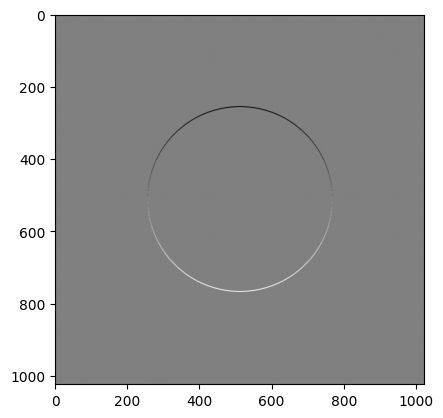

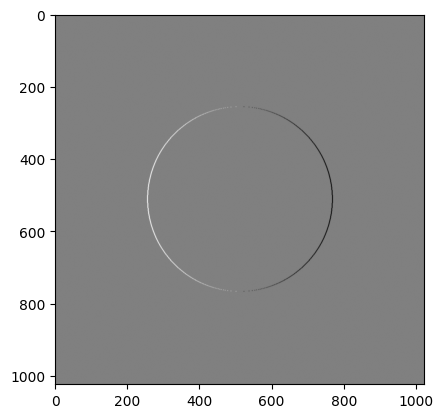

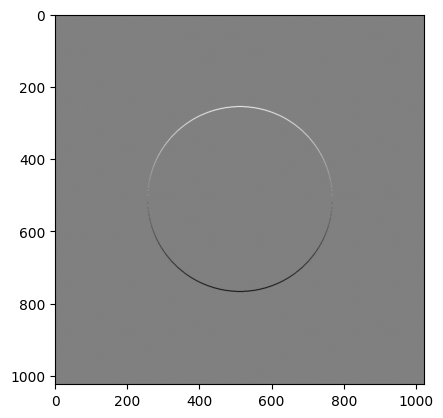

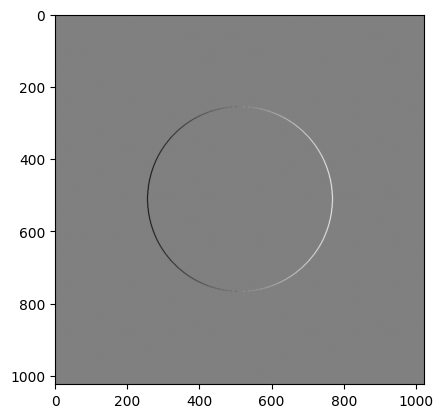

In [7]:
from time import sleep
fig = plt.figure()
for theta in jnp.linspace(0, 360, 5):
    
    theta = jnp.pi * theta / 180
    img_theta = jnp.cos( theta ) * img_x +  jnp.sin( theta ) * img_y
    
    plt.imshow(img_theta, cmap='gray')
    plt.show()